In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Introdução

Esse projeto tem como visão estudar e analisar a motivação das cotas étnicas-raciais e socioeconômicas para uma avaliação e seleção mais justa de candidatos à vagas em universidades de acordo com sua realidade.

Vamos através de análises de dados obtidos pelo IBGE e INEP, realizar algumas análises e fazer algumas conclusões sobre a necessidade (ou não) da existência de cotas.


# Dados utilizados

Para realizar esse estudo, vamos utilizar os dados disponibilizados nos seguintes websites:

http://inep.gov.br/microdados

https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html

Assim como a amostragem de dados fornecidos pela Alura, durante o curso de Imersão de Ciência de Dados, que pode ser obtido através do GitHub pelo link abaixo:

https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv

# Análise da população brasileira

Vamos iniciar nossa análise verificando a população brasileira, conforme a denominação racial feita pelo IBGE no seu censo de 2010:

| Branco | Preto | Amarelo | Pardo | Indigena |
|-|||||
| **81.185.134** | **12.689.002** | **1.879.379** | **74.179.136** | **341.668** |

Utilizando a tabela acima e a biblioteca Pandas, podemos ajustar nossos dados para nossa primeira análise.

In [241]:
ethnicity_brazil = pd.DataFrame([81185134, 16689002, 1879379, 74179136, 341668], ["Branco", "Preto", "Amarelo", "Pardo", "Indigena"], ["População"])
ethnicity_brazil_percentage = ethnicity_brazil/ethnicity_brazil.sum()*100
ethnicity_brazil_percentage

,População
Branco,46.584680
Preto,9.576283
Amarelo,1.078403
Pardo,42.564582
Indigena,0.196052


Como a questão das cotas é destinada às etnias Preta, Parda e Indígena, podemos considerar que a população com direito às cotas correspondem a mais da metade da população brasileira, aproximadamente 52%.

Vamos agora, analisar a distribuição de renda em nosso país.

Da mesma fonte, IBGE, temos os seguintes dados:


| Faixa Salarial (salário mínimo) | Sem rendimento | Menor ou igual à 1/4 | Entre 1/4 e 1/2 | Entre 1/2 e 1 | Entre 1 e 2 | Entre 2 e 3 | Entre 3 e 5 | Maior que 5 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Quantidade de Domicílios| **1.930.648** | **4.701.352** | **8.395.849** | **13.615.535** | **11.710.909** | **3.940.573** | **2.903.484** | **2.777.580** |


Utilizando a mesma técnica que fizemos para as etnias, analisaremos esses dados.

In [237]:
family_income = pd.DataFrame(
    [1930648, 4701352, 8395849, 13615535, 11710909, 3940573, 2903484, 2777580],
    ["Sem rendimento", "Menor ou igual à 1/4", "Entre 1/4 e 1/2", "Entre 1/2 e 1", "Entre 1 e 2", "Entre 2 e 3", "Entre 3 e 5", "Maior que 5"],
    ["Quantidade de Domicílios"])
family_income_percentage = family_income/family_income.sum()*100
family_income_percentage

,Quantidade de Domicílios
Sem rendimento,3.863156
Menor ou igual à 1/4,9.407233
Entre 1/4 e 1/2,16.799785
Entre 1/2 e 1,27.244185
Entre 1 e 2,23.433099
Entre 2 e 3,7.884942
Entre 3 e 5,5.809765
Maior que 5,5.557836


Infelizmente, pela limitação das faixas fornecidas, podemos verificar apenas uma faixa acima de 5 salários mínimos e que contém menos de 6% da população brasileira.

Importante salientar também que mais de 88% da população brasileira possui renda média abaixo de 3 salários mínimos. Vamos utilizar esse dado para nossas análises futuras.

Podemos agora, plotar dois gráficos com essas distribuições para uma melhor visualização.

<Figure size 432x288 with 0 Axes>

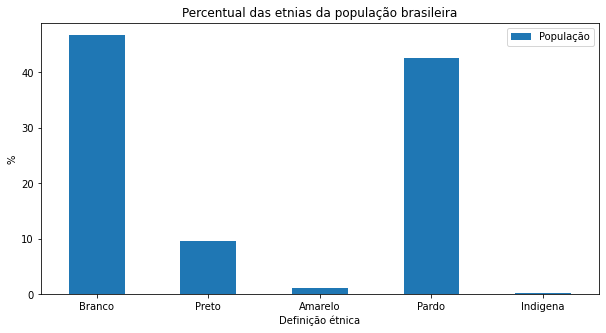

In [245]:
plt.figure()
ethnicity_brazil_percentage.plot(kind="bar", figsize=(10,5))
plt.xticks(rotation=0)
plt.xlabel('Definição étnica')
plt.ylabel('%')
plt.title('Percentual das etnias da população brasileira')
plt.show()

<Figure size 432x288 with 0 Axes>

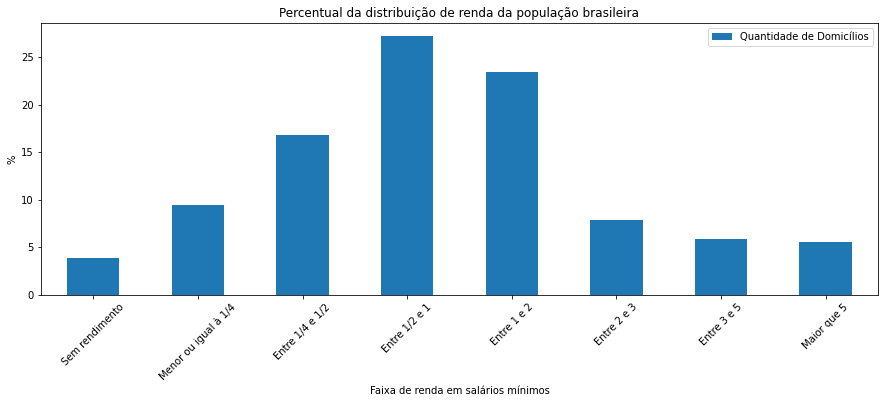

In [244]:
plt.figure()
family_income_percentage.plot(kind="bar", figsize=(15,5))
plt.xticks(rotation=45)
plt.xlabel('Faixa de renda em salários mínimos')
plt.ylabel('%')
plt.title('Percentual da distribuição de renda da população brasileira')
plt.show()

# Análises histórico das universidades

Com os dados nacionais explorados acima, vamos agora iniciar a nossa análise sob a base de dados do ENADE feita pelo INEP e comparar os anos de 2004 (a base mais antiga disponibilizada) e 2019 (a base mais recente).

In [34]:
# Vamos setar algumas variáveis para facilitar nossas análises dos dados
A_E = ["A", "B", "C", "D", "E"]
A_F = ["A", "B", "C", "D", "E", "F"]
A_G = ["A", "B", "C", "D", "E", "F", "G"]

# Devido ao tamanho dos dados totais, fiz um filtro apenas das colunas que utilizaremos nessa análise e disponibilizei em meu Github através dos links:
# https://raw.githubusercontent.com/thiagocdn/Desafio_Imersao_Dados_Alura/main/data_enade_2004
# https://raw.githubusercontent.com/thiagocdn/Desafio_Imersao_Dados_Alura/main/data_enade_2019

# Abaixo, vamos carregar e "limpar" os dados para o ENADE 2005.
data_enade_2004 = pd.read_csv('https://raw.githubusercontent.com/thiagocdn/Desafio_Imersao_Dados_Alura/main/data_enade_2004')
data_enade_2004 = data_enade_2004.drop("Unnamed: 0", axis=1)
data_enade_2004 = data_enade_2004.query("QE_I4 != '.' & QE_I4 != '*' & QE_I6 != '.' & QE_I6 != '*'")

# Abaixo vamos carregar e "limpar" os dados para o ENADE 2019.
data_enade_2019 = pd.read_csv('https://raw.githubusercontent.com/thiagocdn/Desafio_Imersao_Dados_Alura/main/data_enade_2019')
data_enade_2019 = data_enade_2019.drop("Unnamed: 0", axis=1)
# LIMPAR AS RESPOSTAS INVALIDAS
data_enade_2019 = data_enade_2019.query("QE_I02 != ' ' & QE_I08 != ' '")

In [37]:
# Verificando nossos dados de 2004 e 2019:
data_enade_2004.head()

,QE_I4,QE_I6
0,A,C
1,A,B
2,A,D
3,A,C
4,A,B


In [31]:
data_enade_2019.head()

,QE_I02,QE_I08
0,C,B
1,A,E
2,A,E
3,D,E
5,A,C


Para as tabelas, temos as seguintes legendas:

**ENADE 2004:**

- **"QE_I4"**: Como você se considera?
      A. Branco(a).
      B. Negro(a).
      C. Pardo(a) / mulato(a).
      D. Amarelo(a) (de origem oriental).
      E. Indígena ou de origem indígena.

- **"QE_I6"**: Qual a faixa de renda mensal das pessoas que
moram em sua casa?
      A. Até 3 salários-mínimos.
      B. De 3 a 10 salários-mínimos.
      C. De 10 a 20 salários-mínimos.
      D. De 20 a 30 salários-mínimos.
      E. Mais de 30 salários-mínimos.


**ENADE 2019:**

- **"QE_I02"**: Qual é a sua cor ou raça?
      A. Branca.
      B. Preta.
      C. Amarela.
      D. Parda.
      E. Indígena.
      F. Não quero declarar.

- **"QE_I08"**: Qual a renda total de sua família, incluindo seus rendimentos?
      A. Até 1,5 salário mínimo (até R$ 1.431,00).
B. De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2.862,00).
C. De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4.293,00).
D. De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5.724,00).
E. De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.540,00).
F. De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 28.620,00).
G. Acima de 30 salários mínimos (mais de R$ 28.620,00).


Um ponto histórico importante a ser exposto nesse momento é que as cotas ficaram com mais força e maiores discussões a partir do ano de 2000.

Considerando que os cursos de graduação normalmente tem duração de mais de 4 anos, os dados do ENADE 2004 refletem os alunos/ingressantes anteriores ao ano 2000.

## Dados Enade

Vamos agora, verificar a distrubuição dos nossos dados do ENADE de 2004 e 2019.

In [39]:
# Para a Questão de Etnia em 2004, temos:
data_enade_2004["QE_I4"].value_counts(normalize=True).sort_index()

A    0.735122
B    0.037028
C    0.195724
D    0.023208
E    0.008917
Name: QE_I4, dtype: float64

In [40]:
# Enquanto a distribuição das Etnias em 2019, temos:
data_enade_2019["QE_I02"].value_counts(normalize=True).sort_index()

A    0.540332
B    0.080582
C    0.024746
D    0.332872
E    0.003187
F    0.018280
Name: QE_I02, dtype: float64

De imediato, podemos ver uma grande diferença na distribuição das etnias entre os formandos de 2004 e 2019. Isso é um reflexo dos projetos de cotas e inclusão adotados a partir do ano 2000. A seguir, iremos verificar essa diferença graficamente para uma melhor visualização, porém primeiramente precisamos analisar a questão da renda

In [42]:
# Para a questão de rendas em 2004, temos:
data_enade_2004["QE_I6"].value_counts(normalize=True).sort_index()

A    0.218138
B    0.479857
C    0.186477
D    0.068207
E    0.047321
Name: QE_I6, dtype: float64

In [44]:
# Enquanto a distribuição de renda em 2019, temos:
data_enade_2019["QE_I08"].value_counts(normalize=True).sort_index()

A    0.180502
B    0.279419
C    0.203870
D    0.115488
E    0.123018
F    0.081350
G    0.016353
Name: QE_I08, dtype: float64

A análise de renda fica um pouco mais complicada de ser feita pelos intervalos adotados nas pesquisas. Porém vemos que as classes mais baixas (até 3 salarios mínimos) que encaixa na primeira faixa de 2004 teve um aumento expressivo de aproximadamente 22% para 46%. Enquanto os mais ricos (rendas acima de 10 salários mínimos) teve uma queda de representação indo de aproximadamente 30% para 10%.

Abaixo, vamos formatar esses dados e colocá-los em alguns gráficos para evidênciar essas afirmações.

In [246]:
# Vamos colocar as etnias beneficiadas pelas cotas raciais (Pretas, Pardas e Indígenas) em um único grupo para uma melhor análise.
ethnicity_enade_2004_2019_percentage = pd.DataFrame(
    [[(0.735122)*100,(0.540332)*100],
     [(0.037028 + 0.195724 + 0.008917)*100,(0.080582 + 0.332872 + 0.003187)*100],
     [0.023208*100,0.024746*100],
     [0,0.016353*100]],
    ["Branco", "Preto/Pardo/Indígena", "Amarelo", "Não declarado"],
    ["2004", "2019"])

ethnicity_enade_2004_2019_percentage

,2004,2019
Branco,73.5122,54.0332
Preto/Pardo/Indígena,24.1669,41.6641
Amarelo,2.3208,2.4746
Não declarado,0.0000,1.6353


<Figure size 432x288 with 0 Axes>

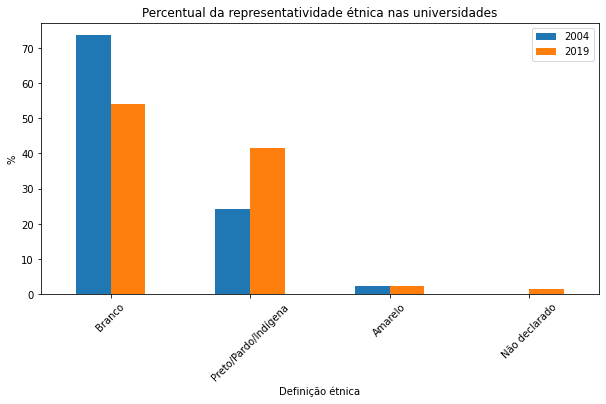

In [248]:
# Criando o gráfico comparativo
plt.figure()
ethnicity_enade_2004_2019_percentage.plot(kind="bar", figsize=(10,5))
plt.xticks(rotation=45)
plt.xlabel('Definição étnica')
plt.ylabel('%')
plt.title('Percentual da representatividade étnica nas universidades')
plt.show()

Através do gráfico acima, podemos visualizar a eficiência dos programas de cotas raciais entre os formandos de 2004 e 2019.

Como mencionado anteriormente, a população "Branca" das universidades em 2004 era de aproximadamente 73%, enquanto ela representa apenas 47% da população brasileira. Essa diferença diminuiu para o ano de 2019 caindo para uma representatividade de 54%.

Agora, analisando a população beneficiada pelas cotas, em 2004 tinha uma representatividade de apenas 24% que subiu para quase 42% em 2019. Essas etnias possuem uma representatividade de 54% da população brasileira.

Vamos também fazer a mesma análise para a questão de renda.

OBS: Como as faixas de rendas não têm um padrão de divisão iguais, vamos apenas considerar as rendas abaixo de 3 salários minimos e acima de 10 salários mínimos.

In [249]:
# Vamos ajustar nossos dados de rendas para conseguirmos visualizar graficamente.
income_enade_2004_2019_percentage = pd.DataFrame(
    [[0.218138*100,(0.186477 + 0.068207 + 0.047321)*100],
     [(0.180502 + 0.279419)*100,(0.081350 + 0.016353)*100]],
    ["Abaixo de 3 salários mínimos", "Acima de 10 salários mínimos"],
    ["2004", "2019"])

income_enade_2004_2019_percentage

,2004,2019
Abaixo de 3 salários mínimos,21.8138,30.2005
Acima de 10 salários mínimos,45.9921,9.7703


<Figure size 432x288 with 0 Axes>

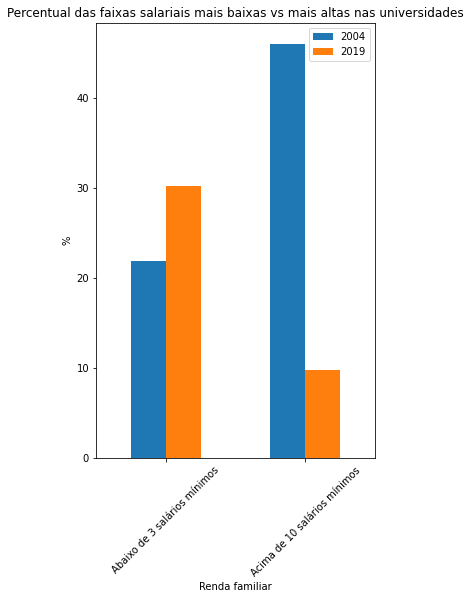

In [250]:
# Criando o gráfico comparativo
plt.figure()
income_enade_2004_2019_percentage.plot(kind="bar", figsize=(5,8))
plt.xticks(rotation=45)
plt.xlabel('Renda familiar')
plt.ylabel('%')
plt.title('Percentual das faixas salariais mais baixas vs mais altas nas universidades')
plt.show()

Vimos em nossa análise inicial que, 88% da população brasileira tem uma renda mensal menor que 3 salários mínimos.

Em 2004 a representatividade dessa classe nas universidades era menos de 22% enquanto em 2019 subiu para mais de 30%. Ainda existe um grande gap entre a população real desse grupo e sua representatividade nas universidade, porém já vemos um avanço no sentido de diminuir essa desigualdade.

Já para os mais ricos, que representam menos de 6% da população brasileira, em 2004 ocupavam quase 46% das vagas nas universidades enquanto em 2019 esse número caiu para menos de 10%.

# Primeiras conclusões

Através das analises anteriores podemos concluir que o gap que tínhamos no passado para questões étnicas, apesar de ainda existir e precisar melhorar, já está bem menor. Como visto, esse grupo representa 54% da população brasileira enquanto está sendo representado por uma população de 47% nas universidades.

Porém, podemos ver uma grande falta da população mais carente nas universidades. Esse grupo representa 88% da população brasileira e está sendo representado apenas por 30% da população das universidades.

# Ainda é necessário?

Fica uma questão muito importante... ainda é necessário esse sistema de cotas?

Vamos analisar os dados fornecidos pela Alura sobre o ENEM 2019 para termos uma conclusão...

In [254]:
data_enem2019_provided = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

In [79]:
data_enem2019_provided.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


Como podemos verificar pela tabela acima, tamos muita informação nesse conjunto de dados. Vamos filtrá-lo para manter apenas as informações que precisaremos para realizar nossas analises.

Como iremos verificar o desempenho dos alunos junto com sua etnia e classe social, manteremos as informações relativas à esses dados.

In [255]:
filtered_enem2019_data = data_enem2019_provided[["TP_COR_RACA", "TP_ESCOLA", "Q006", "Q005", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]]
filtered_enem2019_data.head()

,TP_COR_RACA,TP_ESCOLA,Q006,Q005,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
0,3,1,B,4,435.6,512.3,432.4,488.6,420.0
1,3,1,B,4,NaN,409.3,NaN,375.3,400.0
2,1,1,C,5,423.2,499.1,427.2,441.0,560.0
3,3,1,B,1,426.2,578.1,499.9,551.5,500.0
4,3,1,E,3,516.5,571.3,424.5,511.2,780.0


**Legendas da Tabela Filtrada**

- **"TP_COR_RACA"**: Cor/Raça
      0. Não declarado
      1. Branca
      2. Preta
      3. Parda
      4. Amarela
      5. Indígena 

- **"TP_ESCOLA"**: Tipo de escola do Ensino Médio
      1. Não Respondeu
      2. Pública
      3. Privada
      4. Exterior

- **"Q006"**: Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
      A. Nenhuma renda.
      B. Até R$ 998,00. (1 salário mínimo)
C. De R$ 998,01 até R$ 1.497,00. (de 1 à 1,5 salários)
D. De R$ 1.497,01 até R$ 1.996,00. (de 1,5 à 2 salários)
E. De R$ 1.996,01 até R$ 2.495,00. (de 2 a 2,5 salários)
F. De R$ 2.495,01 até R$ 2.994,00. (de 2,5 à 3 salários)
G. De R$ 2.994,01 até R$ 3.992,00. (de 3 à 4 salários)
H. De R$ 3.992,01 até R$ 4.990,00. (de 4 à 5 salários)
I. De R$ 4.990,01 até R$ 5.988,00. (de 5 à 6 salários)
J. De R$ 5.988,01 até R$ 6.986,00. (de 6 à 7 salários)
K. De R$ 6.986,01 até R$ 7.984,00. (de 7 à 8 salários)
L. De R$ 7.984,01 até R$ 8.982,00. (de 8 à 9 salários)
M. De R$ 8.982,01 até R$ 9.980,00. (de 9 à 10 salários)
N. De R$ 9.980,01 até R$ 11.976,00. (de 10 à 12 salários)
O. De R$ 11.976,01 até R$ 14.970,00. (de 12 à 15 salários)
P. De R$ 14.970,01 até R$ 19.960,00. (de 15 à 20 salários)
Q. Mais de R$ 19.960,00. (mais de 20 salários)

- **"Q005"**: Incluindo você, quantas pessoas moram atualmente em sua residência?
      1. 1, pois moro sozinho(a).
      2. 2
      3. 3
      4. 4
      5. 5
      6. 6
      7. 7
      8. 8
      9. 9
      10. 10
      11. 11
      12. 12
      13. 13
      14. 14
      15. 15
      16. 16
      17. 17
      18. 18
      19. 19
      20. 20

- **"NU_NOTA_CN"**: Nota da prova de Ciências da Natureza
      Valor numérico da nota da prova de Ciências da Natureza

- **"NU_NOTA_CH"**: Nota da prova de Ciências Humanas
      Valor numérico da nota da prova de Ciências Humanas

- **"NU_NOTA_MT"**: Nota da prova de Linguagens e Códigos
      Valor numérico da nota da prova de Linguagens e Códigos

- **"NU_NOTA_LC"**: Nota da prova de Matemática
      Valor numérico da nota da prova de Matemática

- **"NU_NOTA_REDACAO"**: Nota da prova de redação
      Valor numérico da nota da prova de redação
		



Vamos agora incluir um novo dado em nossa tabela que será a nota total; isso é, a somatoria de todas as notas de cada candidato e verificar como ficará a distribuição das notas no gráfico abaixo.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


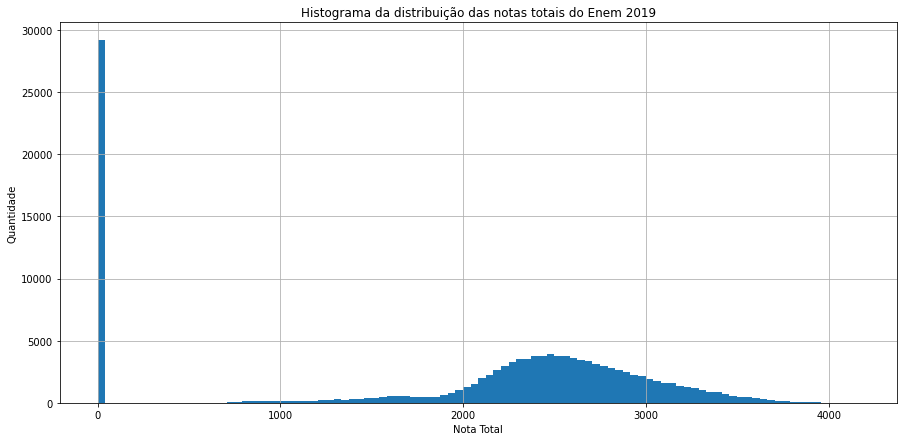

In [257]:
tests = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
filtered_enem2019_data["NU_NOTA_TOTAL"] = filtered_enem2019_data[tests].sum(axis=1)

# Criando histograma das notas totais dos candidatos
plt.figure()
filtered_enem2019_data["NU_NOTA_TOTAL"].hist(bins=100, figsize=(15,7))
plt.xlabel('Nota Total')
plt.ylabel('Quantidade')
plt.title('Histograma da distribuição das notas totais do Enem 2019')
plt.show()

Podemos ver pelo gráfico acima que existe uma quantidade muito grande de notas totais iguais à 0. Após algumas análises, verificamos que essas notas são, em quase todos os casos (com excessão de 2), alunos que não compareceram em nenhum dos dias de provas.

Assim, podemos filtrar esses dados para limpar a nossa análise.

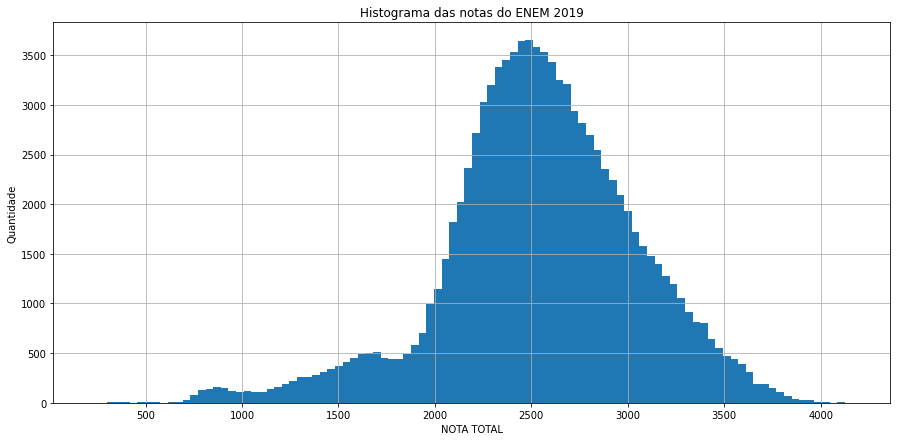

In [258]:
filtered_enem2019_data = filtered_enem2019_data.query("NU_NOTA_TOTAL != 0")
filtered_enem2019_data["NU_NOTA_TOTAL"].hist(bins=100, figsize=(15,7))
plt.xlabel('NOTA TOTAL')
plt.ylabel('Quantidade')
plt.title('Histograma das notas do ENEM 2019')
plt.show()

Podemos agora iniciar nossas análises com os dados do DataFrame 'filtered_enem2019_data'. Vamos iniciar encontrando a média de todas as notas.

2542.394274980138


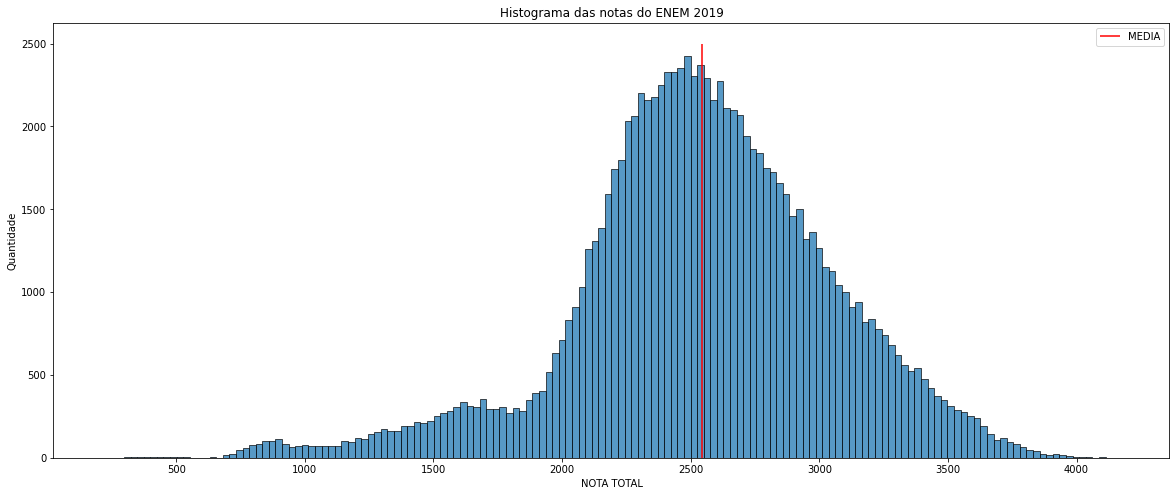

In [139]:
print(filtered_enem2019_data["NU_NOTA_TOTAL"].mean())

plt.figure(figsize=(20,8))
sns.histplot(filtered_enem2019_data, x="NU_NOTA_TOTAL")
plt.vlines(x=filtered_enem2019_data["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2500, label="MEDIA", color="red")
plt.xlabel('NOTA TOTAL')
plt.ylabel('Quantidade')
plt.title('Histograma das notas do ENEM 2019')
plt.legend()
plt.show()

Conforme calculado, podemos verificar que a média geral das notas totais foi de 2542.39.

# Analise por Etnia

Vamos agora, verificar a distribuição das notas conforme a etnia dos alunos.

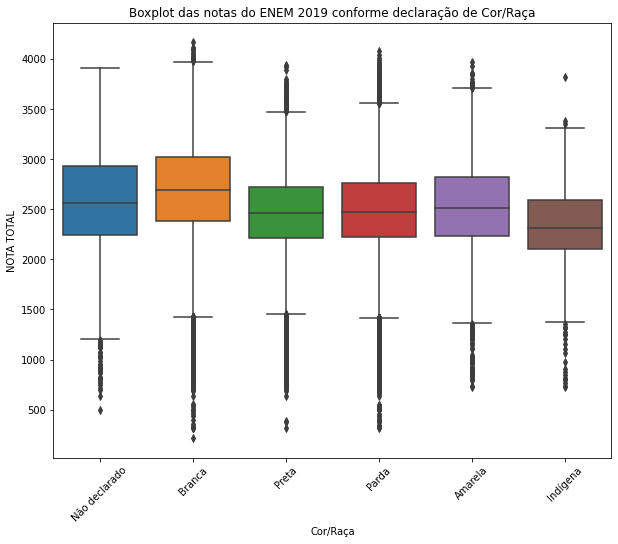

In [196]:
plt.figure(figsize=(10,8))
sns.boxplot(x="TP_COR_RACA", y="NU_NOTA_TOTAL", data=filtered_enem2019_data)
plt.xticks(np.arange(6), ('Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'), rotation=45)
plt.xlabel('Cor/Raça')
plt.ylabel('NOTA TOTAL')
plt.title('Boxplot das notas do ENEM 2019 conforme declaração de Cor/Raça')
plt.show()

Podemos verificar através do gráfico anterior que a média e a distribuição das notas dos grupos cotistas (Preta, Parda e Indígena) estão sensívelmente abaixo das demais não cotistas.

Podemos evidenciar melhor isso através do gráfico de distribuição entre os grupos apresentado abaixo.

MÉDIA DAS NOTAS DOS NÃO COTISTAS: 2665.0298614886574
MÉDIA DAS NOTAS DOS COTISTAS: 2459.7759569191367
DIFERENÇA ENTRE AS MÉDIAS: 205.25390456952073
DIFERENÇA EM PORCENTAGEM: 7.701748769706771%


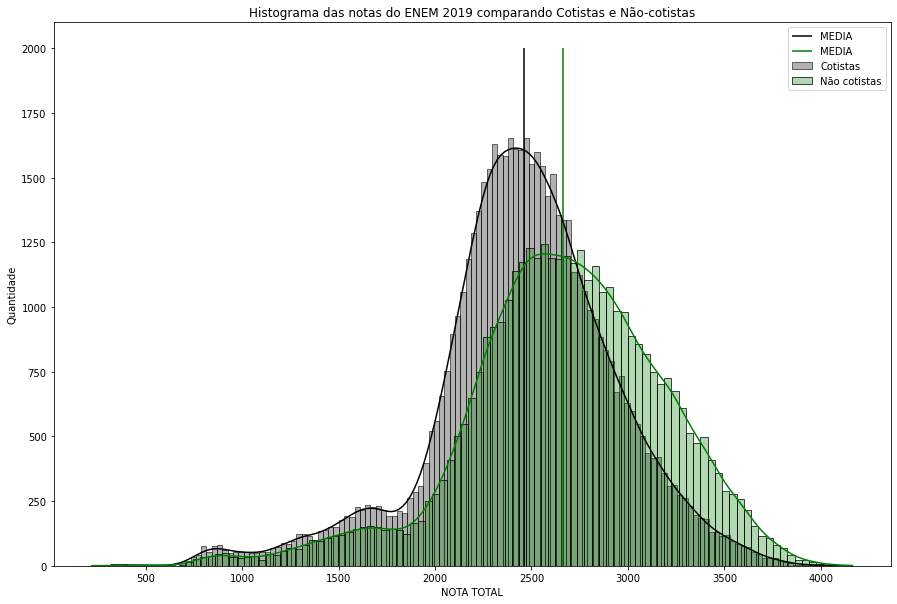

In [222]:
quote_group = filtered_enem2019_data.query("TP_COR_RACA == 2 or TP_COR_RACA == 3 or TP_COR_RACA == 5")
non_quote_group = filtered_enem2019_data.query("TP_COR_RACA == 1 or TP_COR_RACA == 4")

print(f"MÉDIA DAS NOTAS DOS NÃO COTISTAS: {non_quote_group['NU_NOTA_TOTAL'].mean()}")
print(f"MÉDIA DAS NOTAS DOS COTISTAS: {quote_group['NU_NOTA_TOTAL'].mean()}")
diff = non_quote_group['NU_NOTA_TOTAL'].mean() - quote_group['NU_NOTA_TOTAL'].mean()
print(f"DIFERENÇA ENTRE AS MÉDIAS: {diff}")
print(f"DIFERENÇA EM PORCENTAGEM: {diff/non_quote_group['NU_NOTA_TOTAL'].mean()*100}%")


plt.figure(figsize=(15,10))
sns.histplot(quote_group, x="NU_NOTA_TOTAL", color="black", alpha=0.3, kde=True, label="Cotistas")
plt.vlines(x=quote_group["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2000, label="MEDIA", color="black")

sns.histplot(non_quote_group, x="NU_NOTA_TOTAL", color="green", alpha=0.3, kde=True, label="Não cotistas")
plt.vlines(x=non_quote_group["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2000, label="MEDIA", color="green")

plt.xlabel('NOTA TOTAL')
plt.ylabel('Quantidade')
plt.title('Histograma das notas do ENEM 2019 comparando Cotistas e Não-cotistas')
plt.legend()
plt.show()

Podemos verificar uma considerável dispersão entre as notas dos cotistas e não cotistas.

Podemos mensurar essa diferença através da média das notas que foi de 205 pontos ou 7.7% a mais para os não-cotistas.

Vamos tentar diminuir essa diferença incluindo um acréscimo de 7.7% da nota final dos candidatos cotistas.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


MÉDIA DAS NOTAS DOS NÃO COTISTAS: 2665.0298614886574
MÉDIA DAS NOTAS DOS COTISTAS: 2649.1787056018743
DIFERENÇA ENTRE AS MÉDIAS: 15.85115588678309
DIFERENÇA EM PORCENTAGEM: 0.5947834249755386%


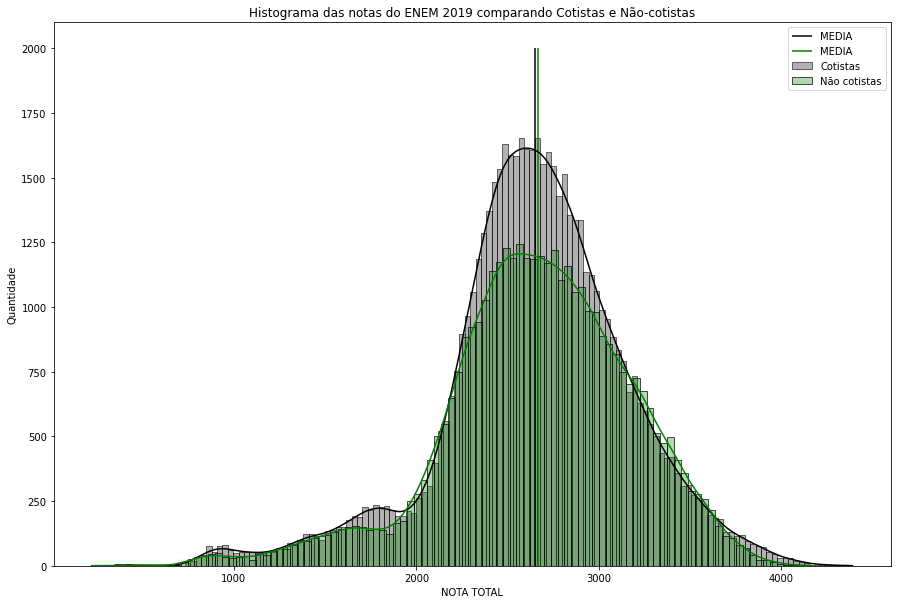

In [223]:
new_quote_group = quote_group
new_quote_group['NU_NOTA_TOTAL'] = quote_group['NU_NOTA_TOTAL'] * 1.077

print(f"MÉDIA DAS NOTAS DOS NÃO COTISTAS: {non_quote_group['NU_NOTA_TOTAL'].mean()}")
print(f"MÉDIA DAS NOTAS DOS COTISTAS: {new_quote_group['NU_NOTA_TOTAL'].mean()}")
diff = non_quote_group['NU_NOTA_TOTAL'].mean() - new_quote_group['NU_NOTA_TOTAL'].mean()
print(f"DIFERENÇA ENTRE AS MÉDIAS: {diff}")
print(f"DIFERENÇA EM PORCENTAGEM: {diff/non_quote_group['NU_NOTA_TOTAL'].mean()*100}%")

plt.figure(figsize=(15,10))
sns.histplot(new_quote_group, x="NU_NOTA_TOTAL", color="black", alpha=0.3, kde=True, label="Cotistas")
plt.vlines(x=new_quote_group["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2000, label="MEDIA", color="black")

sns.histplot(non_quote_group, x="NU_NOTA_TOTAL", color="green", alpha=0.3, kde=True, label="Não cotistas")
plt.vlines(x=non_quote_group["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2000, label="MEDIA", color="green")

plt.xlabel('NOTA TOTAL')
plt.ylabel('Quantidade')
plt.title('Histograma das notas do ENEM 2019 comparando Cotistas e Não-cotistas')
plt.legend()
plt.show()

Apesar da diferença de quantidade de candidatos (uma quantidade muito maior de candidatos cotistas), ao fazer essa correção de notas vemos que as notas e média geral se assemelharam muito. Com essa correção, uma distribuição mais justa conforme a realidade de cada pessoa é feita para a seleção de alunos para as faculdades. O gap que tinhamos de mais de 200 pontos caiu para apenas 15.8 pontos e as histogramas basicamente se sobrepuseram, deixando a dispersão entre eles muito baixa.

**Um grande problema nessa "correção" fica próximo aos 4000 pontos, onde os cotistas se destacaram nessa região crítica de seleção para cursos mais concorridos. Uma análise mais criteriosa sobre essa região e os candidatos envolvidos deve ser feita, pois devem ser pessoas com condições de ter uma base boa de educação e "aproveitar" da cota para se destacar na frente dos demais.**

# Analise por Classe Social

Vamos agora, verificar a distribuição das notas conforme a classe social dos alunos.

Apesar da renda no questionario ser feita como a renda total da residência, por simplicidade da análise, não iremos corrigir esse valor pela quantidade de pessoas na residencia. Faremos as análises direto com os valores fornecidos.

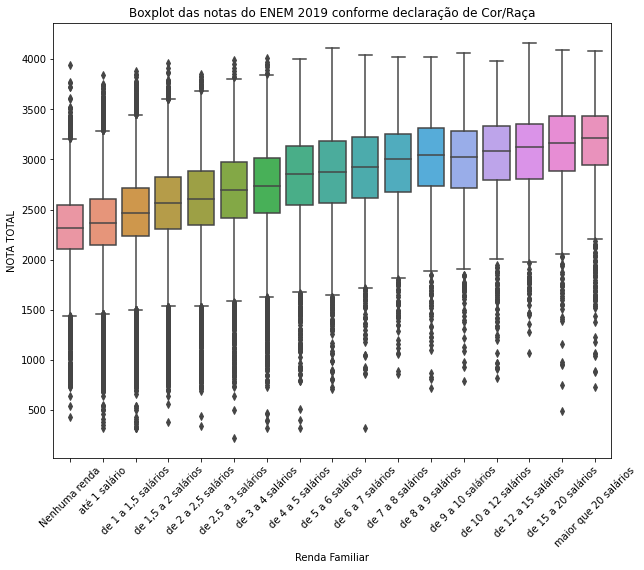

In [197]:
order_A_Q = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q"]
plt.figure(figsize=(10,8))
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=filtered_enem2019_data, order=order_A_Q)
plt.xticks(np.arange(17),
           ('Nenhuma renda',
            'até 1 salário',
            'de 1 a 1,5 salários',
            'de 1,5 a 2 salários',
            'de 2 a 2,5 salários',
            'de 2,5 a 3 salários',
            'de 3 a 4 salários',
            'de 4 a 5 salários',
            'de 5 a 6 salários',
            'de 6 a 7 salários',
            'de 7 a 8 salários',
            'de 8 a 9 salários',
            'de 9 a 10 salários',
            'de 10 a 12 salários',
            'de 12 a 15 salários',
            'de 15 a 20 salários',
            'maior que 20 salários'),
           rotation=45)
plt.xlabel('Renda Familiar')
plt.ylabel('NOTA TOTAL')
plt.title('Boxplot das notas do ENEM 2019 conforme declaração de Cor/Raça')
plt.show()

Através do boxplot feito acima está claro que quanto maior a renda familiar, maior a expectativa de nota do candidato. Aqui identificamos outro ponto de "injustiça" na seleção dos candidatos.

Para uma melhor análise da seleção por classe social, vamos diminuir um pouco os intervalos de renda conforme abaixo:

1. até 2 salários mínimos
2. de 2 à 5 salários mínimos
3. de 5 à 10 salários mínimos
4. acima de 10 salários mínimos

MÉDIA DAS NOTAS ATÉ 2 SALÁRIOS: 2406.921445580186
MÉDIA DAS NOTAS ENTRE 2 e 5 SALÁRIOS: 2670.4086423896633
MÉDIA DAS NOTAS ENTRE 5 e 10 SALÁRIOS: 2899.5750656168047
MÉDIA DAS NOTAS ACIMA de 10 SALÁRIOS: 3070.361187607571
DIFERENÇA ENTRE AS MÉDIAS ATÉ 2 SALÁRIOS e ACIMA DE 10 SALÁRIOS: 663.4397420273849
DIFERENÇA ENTRE AS MÉDIAS ATÉ 5 SALÁRIOS e ACIMA DE 10 SALÁRIOS: 399.95254521790775
DIFERENÇA ENTRE AS MÉDIAS ATÉ 10 SALÁRIOS e ACIMA DE 10 SALÁRIOS: 170.78612199076633

DIFERENÇA EM PORCENTAGEM ENTRE AS MÉDIAS ATÉ 2 SALÁRIOS e ACIMA DE 10 SALÁRIOS: 21.607872868675035%
DIFERENÇA EM PORCENTAGEM ENTRE AS MÉDIAS ATÉ 5 SALÁRIOS e ACIMA DE 10 SALÁRIOS: 13.026237656734816%
DIFERENÇA EM PORCENTAGEM ENTRE AS MÉDIAS ATÉ 10 SALÁRIOS e ACIMA DE 10 SALÁRIOS: 5.56241144136671%


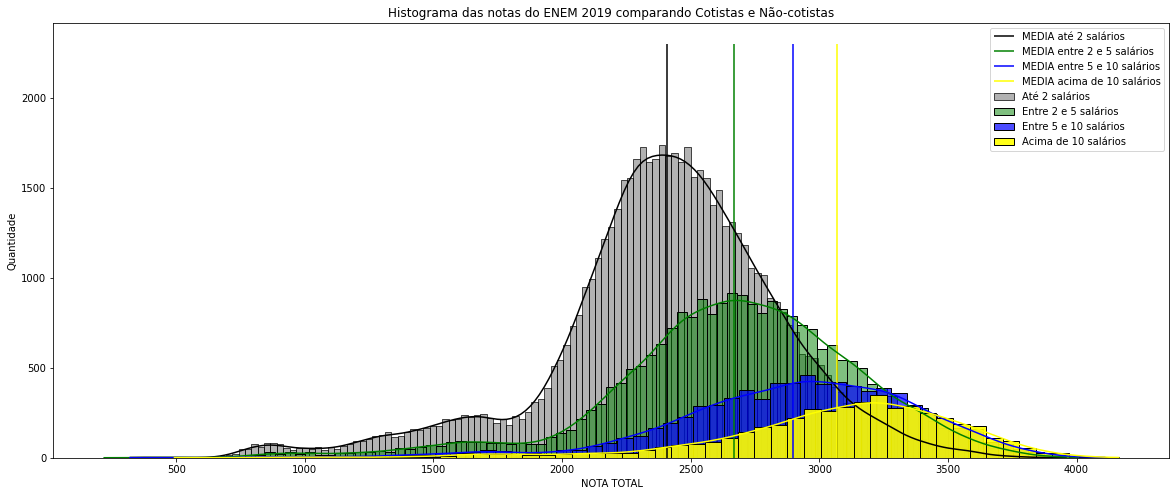

In [230]:
until_2 = filtered_enem2019_data.query("Q006 == 'A' or Q006 == 'B' or Q006 == 'C' or Q006 == 'D'")
until_5 = filtered_enem2019_data.query(" Q006 == 'E' or Q006 == 'F' or Q006 == 'G' or Q006 == 'H'")
until_10 = filtered_enem2019_data.query("Q006 == 'I' or Q006 == 'J' or Q006 == 'K' or Q006 == 'L' or Q006 == 'M'")
above_10 = filtered_enem2019_data.query("Q006 == 'N' or Q006 == 'O' or Q006 == 'P' or Q006 == 'Q'")

print(f"MÉDIA DAS NOTAS ATÉ 2 SALÁRIOS: {until_2['NU_NOTA_TOTAL'].mean()}")
print(f"MÉDIA DAS NOTAS ENTRE 2 e 5 SALÁRIOS: {until_5['NU_NOTA_TOTAL'].mean()}")
print(f"MÉDIA DAS NOTAS ENTRE 5 e 10 SALÁRIOS: {until_10['NU_NOTA_TOTAL'].mean()}")
print(f"MÉDIA DAS NOTAS ACIMA de 10 SALÁRIOS: {above_10['NU_NOTA_TOTAL'].mean()}")

diff_2 = above_10['NU_NOTA_TOTAL'].mean() - until_2['NU_NOTA_TOTAL'].mean()
diff_5 = above_10['NU_NOTA_TOTAL'].mean() - until_5['NU_NOTA_TOTAL'].mean()
diff_10 = above_10['NU_NOTA_TOTAL'].mean() - until_10['NU_NOTA_TOTAL'].mean()

print(f"DIFERENÇA ENTRE AS MÉDIAS ATÉ 2 SALÁRIOS e ACIMA DE 10 SALÁRIOS: {diff_2}")
print(f"DIFERENÇA ENTRE AS MÉDIAS ATÉ 5 SALÁRIOS e ACIMA DE 10 SALÁRIOS: {diff_5}")
print(f"DIFERENÇA ENTRE AS MÉDIAS ATÉ 10 SALÁRIOS e ACIMA DE 10 SALÁRIOS: {diff_10}")

print()

print(f"DIFERENÇA EM PORCENTAGEM ENTRE AS MÉDIAS ATÉ 2 SALÁRIOS e ACIMA DE 10 SALÁRIOS: {diff_2/above_10['NU_NOTA_TOTAL'].mean()*100}%")
print(f"DIFERENÇA EM PORCENTAGEM ENTRE AS MÉDIAS ATÉ 5 SALÁRIOS e ACIMA DE 10 SALÁRIOS: {diff_5/above_10['NU_NOTA_TOTAL'].mean()*100}%")
print(f"DIFERENÇA EM PORCENTAGEM ENTRE AS MÉDIAS ATÉ 10 SALÁRIOS e ACIMA DE 10 SALÁRIOS: {diff_10/above_10['NU_NOTA_TOTAL'].mean()*100}%")

plt.figure(figsize=(20,8))
sns.histplot(until_2, x="NU_NOTA_TOTAL", color="black", alpha=0.3, kde=True, label="Até 2 salários")
plt.vlines(x=until_2["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2300, label="MEDIA até 2 salários", color="black")

sns.histplot(until_5, x="NU_NOTA_TOTAL", color="green", alpha=0.5, kde=True, label="Entre 2 e 5 salários")
plt.vlines(x=until_5["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2300, label="MEDIA entre 2 e 5 salários", color="green")

sns.histplot(until_10, x="NU_NOTA_TOTAL", color="blue", alpha=0.7, kde=True, label="Entre 5 e 10 salários")
plt.vlines(x=until_10["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2300, label="MEDIA entre 5 e 10 salários", color="blue")

sns.histplot(above_10, x="NU_NOTA_TOTAL", color="yellow", alpha=0.9, kde=True, label="Acima de 10 salários")
plt.vlines(x=above_10["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2300, label="MEDIA acima de 10 salários", color="yellow")

plt.xlabel('NOTA TOTAL')
plt.ylabel('Quantidade')
plt.title('Histograma das notas do ENEM 2019 comparando Cotistas e Não-cotistas')
plt.legend()
plt.show()

Realizando a mesma correção que fizemos para as notas conforme etnias:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

NOVA MÉDIA DAS NOTAS ATÉ 2 SALÁRIOS: 2912.3749491519725
NOVA MÉDIA DAS NOTAS ENTRE 2 e 5 SALÁRIOS: 3017.561765900312
NOVA MÉDIA DAS NOTAS ENTRE 5 e 10 SALÁRIOS: 3044.5538188976334
NOVA MÉDIA DAS NOTAS ACIMA de 10 SALÁRIOS: 3070.361187607571
DIFERENÇA ENTRE AS MÉDIAS ATÉ 2 SALÁRIOS e ACIMA DE 10 SALÁRIOS: 157.9862384555986
DIFERENÇA ENTRE AS MÉDIAS ATÉ 5 SALÁRIOS e ACIMA DE 10 SALÁRIOS: 52.79942170725917
DIFERENÇA ENTRE AS MÉDIAS ATÉ 10 SALÁRIOS e ACIMA DE 10 SALÁRIOS: 25.80736870993769

DIFERENÇA EM PORCENTAGEM ENTRE AS MÉDIAS ATÉ 2 SALÁRIOS e ACIMA DE 10 SALÁRIOS: 5.14552617109851%
DIFERENÇA EM PORCENTAGEM ENTRE AS MÉDIAS ATÉ 5 SALÁRIOS e ACIMA DE 10 SALÁRIOS: 1.719648552110592%
DIFERENÇA EM PORCENTAGEM ENTRE AS MÉDIAS ATÉ 10 SALÁRIOS e ACIMA DE 10 SALÁRIOS: 0.8405320134354234%


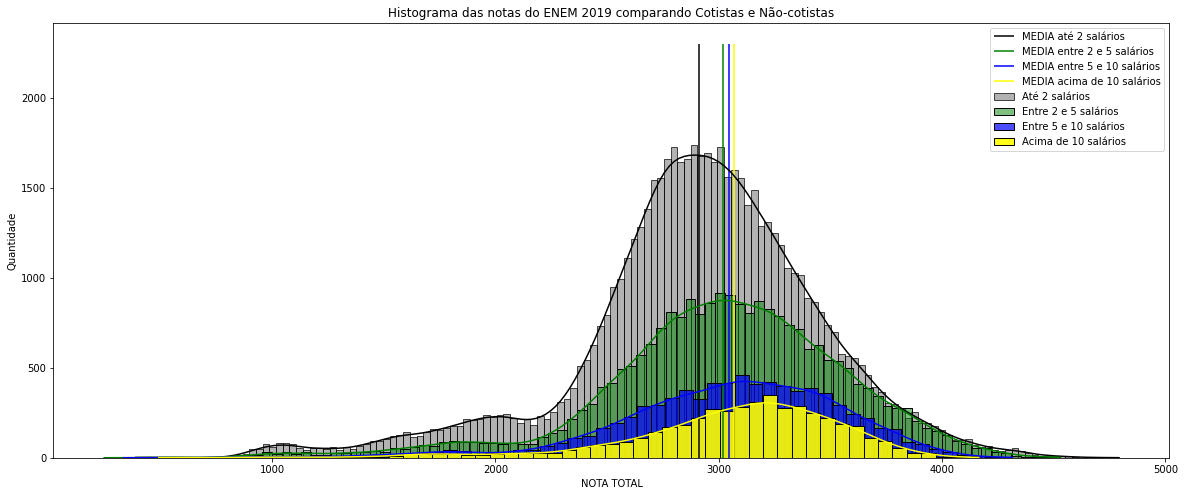

In [231]:
new_until_2 = until_2
new_until_5 = until_5
new_until_10 = until_10

new_until_2["NU_NOTA_TOTAL"] = until_2["NU_NOTA_TOTAL"]*1.21
new_until_5["NU_NOTA_TOTAL"] = until_5["NU_NOTA_TOTAL"]*1.13
new_until_10["NU_NOTA_TOTAL"] = until_10["NU_NOTA_TOTAL"]*1.05

print(f"NOVA MÉDIA DAS NOTAS ATÉ 2 SALÁRIOS: {new_until_2['NU_NOTA_TOTAL'].mean()}")
print(f"NOVA MÉDIA DAS NOTAS ENTRE 2 e 5 SALÁRIOS: {new_until_5['NU_NOTA_TOTAL'].mean()}")
print(f"NOVA MÉDIA DAS NOTAS ENTRE 5 e 10 SALÁRIOS: {new_until_10['NU_NOTA_TOTAL'].mean()}")
print(f"NOVA MÉDIA DAS NOTAS ACIMA de 10 SALÁRIOS: {above_10['NU_NOTA_TOTAL'].mean()}")

diff_2 = above_10['NU_NOTA_TOTAL'].mean() - new_until_2['NU_NOTA_TOTAL'].mean()
diff_5 = above_10['NU_NOTA_TOTAL'].mean() - new_until_5['NU_NOTA_TOTAL'].mean()
diff_10 = above_10['NU_NOTA_TOTAL'].mean() - new_until_10['NU_NOTA_TOTAL'].mean()

print(f"DIFERENÇA ENTRE AS MÉDIAS ATÉ 2 SALÁRIOS e ACIMA DE 10 SALÁRIOS: {diff_2}")
print(f"DIFERENÇA ENTRE AS MÉDIAS ATÉ 5 SALÁRIOS e ACIMA DE 10 SALÁRIOS: {diff_5}")
print(f"DIFERENÇA ENTRE AS MÉDIAS ATÉ 10 SALÁRIOS e ACIMA DE 10 SALÁRIOS: {diff_10}")

print()

print(f"DIFERENÇA EM PORCENTAGEM ENTRE AS MÉDIAS ATÉ 2 SALÁRIOS e ACIMA DE 10 SALÁRIOS: {diff_2/above_10['NU_NOTA_TOTAL'].mean()*100}%")
print(f"DIFERENÇA EM PORCENTAGEM ENTRE AS MÉDIAS ATÉ 5 SALÁRIOS e ACIMA DE 10 SALÁRIOS: {diff_5/above_10['NU_NOTA_TOTAL'].mean()*100}%")
print(f"DIFERENÇA EM PORCENTAGEM ENTRE AS MÉDIAS ATÉ 10 SALÁRIOS e ACIMA DE 10 SALÁRIOS: {diff_10/above_10['NU_NOTA_TOTAL'].mean()*100}%")

plt.figure(figsize=(20,8))
sns.histplot(new_until_2, x="NU_NOTA_TOTAL", color="black", alpha=0.3, kde=True, label="Até 2 salários")
plt.vlines(x=new_until_2["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2300, label="MEDIA até 2 salários", color="black")

sns.histplot(new_until_5, x="NU_NOTA_TOTAL", color="green", alpha=0.5, kde=True, label="Entre 2 e 5 salários")
plt.vlines(x=new_until_5["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2300, label="MEDIA entre 2 e 5 salários", color="green")

sns.histplot(new_until_10, x="NU_NOTA_TOTAL", color="blue", alpha=0.7, kde=True, label="Entre 5 e 10 salários")
plt.vlines(x=new_until_10["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2300, label="MEDIA entre 5 e 10 salários", color="blue")

sns.histplot(above_10, x="NU_NOTA_TOTAL", color="yellow", alpha=0.9, kde=True, label="Acima de 10 salários")
plt.vlines(x=above_10["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2300, label="MEDIA acima de 10 salários", color="yellow")

plt.xlabel('NOTA TOTAL')
plt.ylabel('Quantidade')
plt.title('Histograma das notas do ENEM 2019 comparando Cotistas e Não-cotistas')
plt.legend()
plt.show()

Apesar das médias terem ficado mais próximas, o problema entre as maiores notas que vimos ajustando as notas por etnia ficou muito mais evidente na tentativa de ajustar as notas por classe social.

Uma grande quantidade de alunos com renda de até 5 salários mínimos ficaram a frente dos melhores alunos com rendas maiores. Assim como na comparação dos alunos com renda entre 5 e 10 salários com os alunos com renda acima de 10 salários.

Concluímos que essa estratégia não seria benéfica de modo geral pois estará sendo injusta com os alunos mais ricos com um favorecimento desproporcional para os de menor renda.

# Análise por Tipo de Escola

Faremos uma última análise considerando o tipo de escola dos candidatos (Pública vs Privada). Para essa análise desconsideraremos as respostas "Não respondeu" e "Exterior".

Vamos seguir o mesmo método feito anteriormente. Para isso, filtraremos primeiro nossos dados para termos apenas escolas Públicas e Privadas e na sequência plotar os gráficos para analisar o desempenho de cada um.

MÉDIA DAS NOTAS DAS ESCOLAS PÚBLICAS: 2454.3764860797633
MÉDIA DAS NOTAS DAS ESCOLAS PRIVADAS: 2992.0396914973558
DIFERENÇA ENTRE AS MÉDIAS: 537.6632054175925
DIFERENÇA EM PORCENTAGEM: 17.969788534072585%


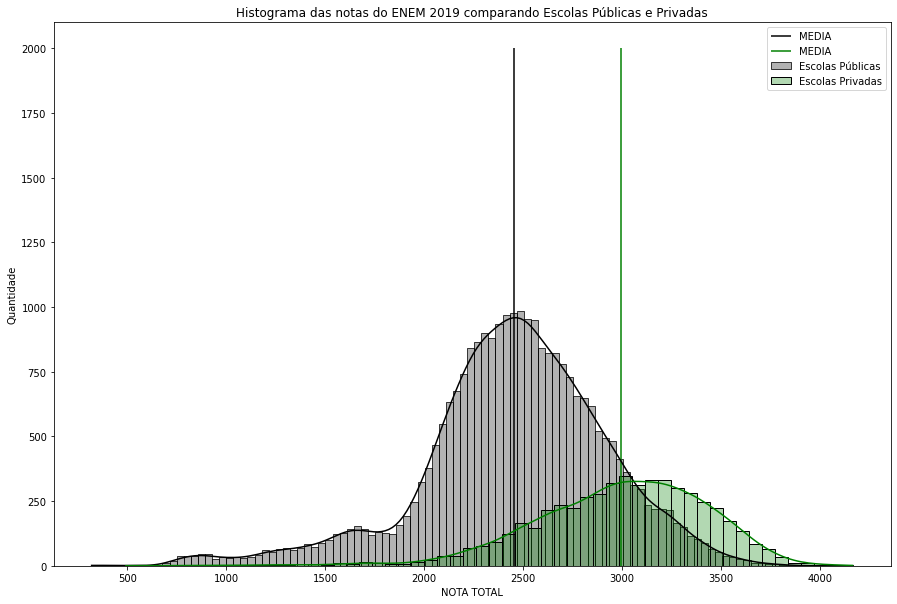

In [233]:
public_schools = filtered_enem2019_data.query("TP_ESCOLA == 2")
private_schools = filtered_enem2019_data.query("TP_ESCOLA == 3")

print(f"MÉDIA DAS NOTAS DAS ESCOLAS PÚBLICAS: {public_schools['NU_NOTA_TOTAL'].mean()}")
print(f"MÉDIA DAS NOTAS DAS ESCOLAS PRIVADAS: {private_schools['NU_NOTA_TOTAL'].mean()}")
diff_schools = private_schools['NU_NOTA_TOTAL'].mean() - public_schools['NU_NOTA_TOTAL'].mean()
print(f"DIFERENÇA ENTRE AS MÉDIAS: {diff_schools}")
print(f"DIFERENÇA EM PORCENTAGEM: {diff_schools/private_schools['NU_NOTA_TOTAL'].mean()*100}%")


plt.figure(figsize=(15,10))
sns.histplot(public_schools, x="NU_NOTA_TOTAL", color="black", alpha=0.3, kde=True, label="Escolas Públicas")
plt.vlines(x=public_schools["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2000, label="MEDIA", color="black")

sns.histplot(private_schools, x="NU_NOTA_TOTAL", color="green", alpha=0.3, kde=True, label="Escolas Privadas")
plt.vlines(x=private_schools["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2000, label="MEDIA", color="green")

plt.xlabel('NOTA TOTAL')
plt.ylabel('Quantidade')
plt.title('Histograma das notas do ENEM 2019 comparando Escolas Públicas e Privadas')
plt.legend()
plt.show()

Pela distribuição dos gráficos, podemos dizer que a nossa correção pela porcentagem da média terá o mesmo efeito que ocorreu na análise das classes sociais onde alguns alunos se destacarão sob alunos excelentes de escolas privadas.

Vamos comprovar essa hipótese através da análise a seguir.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


NOVA MÉDIA DAS NOTAS DAS ESCOLAS PÚBLICAS: 2871.6204887133217
MÉDIA DAS NOTAS DAS ESCOLAS PRIVADAS: 2992.0396914973558
NOVA DIFERENÇA ENTRE AS MÉDIAS: 120.41920278403404
NOVA DIFERENÇA EM PORCENTAGEM: 4.024652584864965%


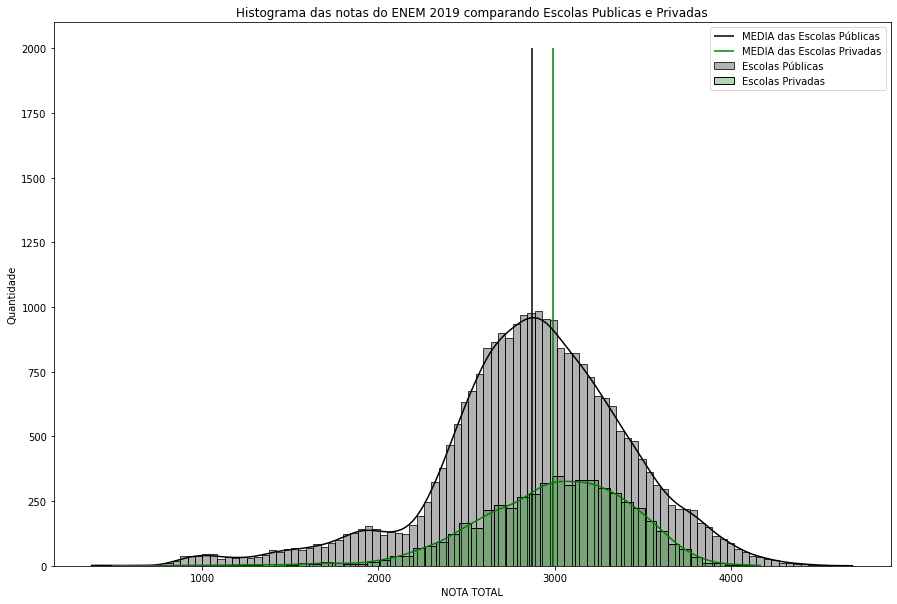

In [234]:
new_public_grade = public_schools
new_public_grade['NU_NOTA_TOTAL'] = public_schools['NU_NOTA_TOTAL'] * 1.17

print(f"NOVA MÉDIA DAS NOTAS DAS ESCOLAS PÚBLICAS: {new_public_grade['NU_NOTA_TOTAL'].mean()}")
print(f"MÉDIA DAS NOTAS DAS ESCOLAS PRIVADAS: {private_schools['NU_NOTA_TOTAL'].mean()}")
diff_schools = private_schools['NU_NOTA_TOTAL'].mean() - new_public_grade['NU_NOTA_TOTAL'].mean()
print(f"NOVA DIFERENÇA ENTRE AS MÉDIAS: {diff_schools}")
print(f"NOVA DIFERENÇA EM PORCENTAGEM: {diff_schools/private_schools['NU_NOTA_TOTAL'].mean()*100}%")

plt.figure(figsize=(15,10))
sns.histplot(new_public_grade, x="NU_NOTA_TOTAL", color="black", alpha=0.3, kde=True, label="Escolas Públicas")
plt.vlines(x=new_public_grade["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2000, label="MEDIA das Escolas Públicas", color="black")

sns.histplot(private_schools, x="NU_NOTA_TOTAL", color="green", alpha=0.3, kde=True, label="Escolas Privadas")
plt.vlines(x=private_schools["NU_NOTA_TOTAL"].mean(), ymin=0, ymax=2000, label="MEDIA das Escolas Privadas", color="green")

plt.xlabel('NOTA TOTAL')
plt.ylabel('Quantidade')
plt.title('Histograma das notas do ENEM 2019 comparando Escolas Publicas e Privadas')
plt.legend()
plt.show()

Nessa correção fica mais evidente a vantagem que os bons alunos de ecolas públicas teriam com relação aos bons alunos de escolas privadas, e ainda assim a diferença entre as médias gerais manteriam uma sensível diferença.

Concluímos que essa estratégia seria a pior entre as analisadas nesse projeto.

# Conclusões Finais

Nesse projeto, ficou evidente a desigualdade entre a distribuição da população brasileira e a seleção de alunos para estudo nas universidades.

A população brasileira é majoritariamente de etnia **Preta / Parda / Indígena** e de classes sociais mais baixas(**renda per capita abaixo de 3 salários mínimos**), conforme vimos no início de nossas análises.

- **52%** da população brasileira se encaixa nessas etnias e **88%** das famílias brasileiras tem uma renda per capita abaixo de 3 salários mínimos.

Enquanto que atualmente, o corpo de estudantes universitários é composto por:

- **41%** de estudantes Pretos / Pardos / Indígenas e **30%** com rendas per capita abaixo de 3 salários mínimos.

Concluímos que essa diferença foi atenuada com o passar dos anos. No ano 2004 esses valores eram:

- **24%** e estudantes Pretos / Pardos / Indígenas e **22%** com rendas per capita abaixo de 3 salários mínimos.

Vimos também como é complicado definir um método para diminuir essa desigualdade deixando todo o espectro de notas justo, a melhor estratégia vista nesse trabalho ficou sob a cota racial. Apesar de haver desigualdade nas vertentes socio-economicas e com relação à escolas públicas, a estratégia adotada inverteu a desigualdade injustiçando consideravelmente os bons alunos dos grupos opostos.

Um estudo mais aprofundado desse tópico analisando e propondo outros métodos e alternativas devem ser feitos para encontrar melhores resultados. Esse trabalho foi feito exclusivamente sob o viés de dados das universidades, sem considerar o histórico e base de educação do Brasil.
